# Hints for Homework 2

## Problem 1

This is a basic problem on integration, or manipulating Mathematica, if you want. Before moving on, a careful observation suggests the expansion involving only $\cos$'s, since the function is even. We have
$$
\int_0^1 \cos(n\pi x)(x-1)^2\,dx+\int_{-1}^0 \cos(n\pi x)(x+1)^2\,dx=2\int_0^1 \cos(n\pi x)(x-1)^2\,dx
$$

This typically needs integration by parts. 
$$
\int_0^1\cos(n\pi x)(x-1)^2\,dx=\frac{1}{n\pi}\int_0^1(x-1)^2\,d(\sin(n\pi x))=\frac{1}{n\pi}\biggl[(x-1)^2\sin(n\pi x)\bigg|_0^1-\int_0^12\sin(n\pi x)(x-1)\,dx\biggr]
$$

The second term is calculated as follows.$$
\int_0^1\sin(n\pi x)(x-1)dx=\frac{1}{n\pi}\biggl[-\cos(n\pi x)(x-1)\bigg|_0^1-\int_0^1\cos(n\pi x)dx\biggr]=\frac{
-1}{n\pi}
$$

Hence the Fourier coefficient is given by $\frac{4}{n^2\pi^2}$ for $n\geq 1$. For $n = 0$, the result can be obtained by calculating$$
2\int_0^1(x-1)^2\,dx = \frac{2}{3}(x-1)^3\bigg|_0^1=\frac{2}{3}
$$

Now the $n-$th Fourier series is given by $$
f_n(x)=\frac{1}{3}+\sum_{k=1}^{n}\frac{4}{n^2\pi^2}\cos(n\pi x)
$$

In [1]:
import numpy as np
def fourier_coeff(n):
    return 4./(np.pi*np.pi)/(n*n)

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
def fourier_series(x,N):
    series = 1./3.
    for i in range(1,N+1):
        partial_sum = fourier_coeff(i)*np.cos(i*np.pi*x)
        series += fourier_coeff(i)*np.cos(i*np.pi*x)
    return series
        

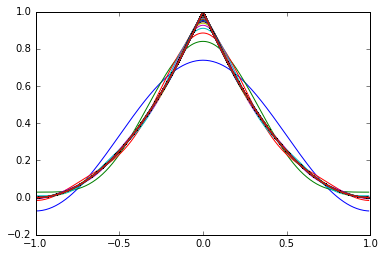

In [3]:
x = np.arange(-1.,1.,.01)
N = 10
for j in range(1,2**(N+1)):
    plt.plot(x,fourier_series(x,j))
plt.show()

## Problem 2

This is a pure math problem. Using separation of variables, we assume $\psi(r,\theta,z)=X(r)Y(\theta)Z(z)$ and insert this expression into the Laplace equation under the cylindrical coordinate:
$$
\biggl[X''(r)+\frac{1}{r}X'(r)\biggr]Y(\theta)Z(z)+\frac{1}{r^2}X(r)Y''(\theta)Z(z)+X(r)Y(\theta)Z''(z)=0
$$

Hence we arrive at the following three sets of ODE's.
$$
r^2X''(r)+rX'(r)=(r^2m^2+n^2)X(r)
$$

$$
Y''(\theta)=-n^2Y(\theta)\\
$$

$$
Z''(z)=-m^2Z(z)\\
Z(0)=Z(L)=0
$$
**Notice here we usually solve $Z(z)$ as hyperbolic ones. However, with periodic boundary conditions one has to solve $Z(z)$ as trigonometric functions.** The reason is that if we set
$$
Z(z)=ae^{mz}+be^{-mz}
$$
and then insert in $z(0)=z(L)=0$, we will obtain
$$
a+b=0,\,ae^{mL}+be^{-mL}=0
$$
which gives $a=b=0$, and $Z(z)=0$ for all $z$.

We also impose the boundary condition
$$
X(a)Y(\theta)Z(z)=\Psi(\theta,z)
$$

It is easy to see that $X(r)$ is the parametrized modified Bessel's function of the first kind (suppose no singularity at the origin) given by
$$
X(r)=I_n(mr)
$$

$Y(\theta)$ is harmonics
$$
Y(\theta)=A_n\cos(n\theta)+B_n\sin(n\theta)
$$

$Z(z)$ is the sine function
$$
Z(z)=C_m\cos(mz)+D_m\sin(mz)
$$

## Problem 3

Let's first of all recall what we learned from last lecture. We can solve the steady-state heat equation on a disk using separation of variables. The symmetric boundary conditions on the angle $\varphi$ suggest that our modal expansions with respect to the angle shall be $\cos(n\varphi)$, rather than $\sin(n\varphi)$. We hence obtain the following
$$
\psi(r,\varphi)=\mathop{\sum}_{k=0}^{\infty}a_kr^k\cos(k\varphi)
$$
The boundary condition is given as $\varphi(R_0,\varphi)=\Psi(\varphi)$. In other words, if we set $r=R_0$, the above modal expansion actually gives a Fourier expansion of $\Psi(\varphi)$.
$$
\mathop{\sum}_{k=0}^{\infty}a_kR_0^k\cos(k\varphi)=\Psi(\varphi)
$$

The nest step is naturally to calculate the Fourier expansion of $\Psi(r)$. Notice that
$$
50\cdot\int_{-\varphi_D/2}^{\varphi_D/2}(1-4\frac{\varphi^2}{\varphi_D^2})\cos(n\varphi)\,d\varphi=50\cdot\biggl[\frac{16}{n^3\varphi_D^2}\sin(n\frac{\varphi_D}{2})-\frac{8}{n^2\varphi_D}\cos(n\frac{\varphi_D}{2})\biggr]
$$
We thus have
$$
a_kR_0^k=\frac{1}{\pi}\cdot50\cdot\biggl[\frac{16}{n^3\varphi_D^2}\sin(n\frac{\varphi_D}{2})-\frac{8}{n^2\varphi_D}\cos(n\frac{\varphi_D}{2})\biggr]
$$
for $k\geq1$, and
$$
a_0=\frac{1}{2}\cdot50\cdot\int_{-\varphi_D/2}^{\varphi_D/2}\biggl(1-4\frac{\varphi^2}{\varphi_D^2}\biggr)\,d\varphi=\frac{50\varphi_D}{3\pi}
$$

Therefore the final answer will be
$$
a_k=\frac{50}{\pi\cdot R_0^k}\cdot\biggl[\frac{16}{n^3\varphi_D^2}\sin(n\frac{\varphi_D}{2})-\frac{8}{n^2\varphi_D}\cos(n\frac{\varphi_D}{2})\biggr]
$$ for $k\geq1$, and
$$
a_0=\frac{50\varphi_D}{3\pi}
$$

Now we can implement our code for plotting the solution as modal expansions.

In [4]:
# This is the code generating the Fourier coefficients.
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
import matplotlib.pyplot as plt

R_0 = 5. # Global variable, the radius of the disk.
phi_D = 2*np.pi*.1 # Global variable, the threshold of boundary condition.
temp = 50. # Global variable, the temperature peak.
N_R = .01 # Globl variable, number of radius discretization
N_p = .1 # Global variable, number of angle discretization
def expansion_coeff(k):
    if k == 0:
        return temp*phi_D/(3*np.pi)
    else:
        a = temp/(np.pi*np.power(R_0, k))/(k*k*k*phi_D*phi_D)*(16*np.sin(k*phi_D/2)-8*k*phi_D*np.cos(k*phi_D/2))
    return a

In [5]:
expansion_coeff(1) # As a test

1.3202201613964148

In [6]:
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)
R = np.arange(0.,R_0,N_R)
phi = np.arange(-np.pi,np.pi,N_p)
R, phi = np.meshgrid(R,phi)
X,Y = pol2cart(R,phi)

def heat_solution(N):
    series = expansion_coeff(0)
    for j in range(1,N):
        partial_sum = expansion_coeff(j)*np.power(R,j)*np.cos(j*phi)
        series += partial_sum
    return series

In [7]:
np.size(heat_solution(2))

31500

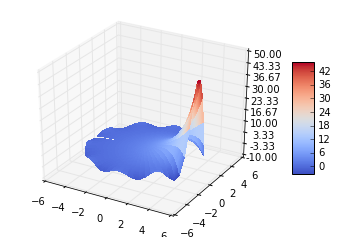

In [8]:
series = heat_solution(10)
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, series, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()